In [1]:
import pandas as pd

df = pd.read_csv('Emisiones_Totales_S_Todos_los_Datos_(Normalizado).csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397366 entries, 0 to 2397365
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Código del área        int64  
 1   Código del área (M49)  object 
 2   Área                   object 
 3   Código del producto    int64  
 4   Producto               object 
 5   Código del elemento    int64  
 6   Elemento               object 
 7   Código del año         int64  
 8   Año                    int64  
 9   Código fuente          int64  
 10  Fuente                 object 
 11  Unidad                 object 
 12  Valor                  float64
 13  Símbolo                object 
 14  Nota                   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 274.4+ MB


In [2]:
df.head()

,Código del área,Código del área (M49),Área,Código del producto,Producto,Código del elemento,Elemento,Código del año,Año,Código fuente,Fuente,Unidad,Valor,Símbolo,Nota
0,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1961,1961,3050,FAO TIER 1,kilotones,0.8762,E,NaN
1,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1962,1962,3050,FAO TIER 1,kilotones,0.8829,E,NaN
2,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1963,1963,3050,FAO TIER 1,kilotones,0.8236,E,NaN
3,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1964,1964,3050,FAO TIER 1,kilotones,0.8882,E,NaN
4,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1965,1965,3050,FAO TIER 1,kilotones,0.8978,E,NaN


In [5]:
df[df['Año'] < 1990]["Producto"].unique()

array(['Residuos agrícolas', 'Cultivo del arroz',
       'Quemado de residuos agrícolas', 'Fermentación entérica',
       'Gestión del estiércol', 'Estiércol depositado en las pasturas',
       'Estiércol aplicado a los suelos', 'Fertilizantes sintéticos',
       'Energía', 'IPPU', 'Desechos', 'Otro',
       'Emisiones derivadas de los cultivos',
       'Emissiones derivadas del sector ganadero', 'IPCC Agricultura',
       'Suelos agrícolas'], dtype=object)

In [6]:
df[df['Año'] > 1990]["Producto"].unique()

array(['Residuos agrícolas', 'Cultivo del arroz',
       'Quemado de residuos agrícolas', 'Fermentación entérica',
       'Gestión del estiércol', 'Estiércol depositado en las pasturas',
       'Estiércol aplicado a los suelos', 'Fertilizantes sintéticos',
       'Suelos orgánicos drenados', 'Suelos orgánicos drenados (CO2)',
       'Suelos orgánicos drenados (N2O)', 'On-farm energy use',
       'Tierras forestales', 'Conversión neta de bosques',
       'Incendios de sabana', 'Incendios en suelos de turba',
       'Incendios forestales',
       'Incendios en los bosques tropicales húmedos',
       'Eliminación de desechos de sistemas agroalimentarios',
       'Fabricación de fertilizantes', 'Venta de alimentos',
       'Consumo\xa0de alimentos en los hogares',
       'Transformación\xa0de alimentos', 'Energía', 'IPPU', 'Desechos',
       'Otro', 'Sistemas agroalimentarios', 'Farm gate',
       'Cambios de uso de la tierra', 'Pre y\xa0post-producción',
       'Emisiones en tierras agríc

In [7]:
# Asumimos que df tiene columnas: ['Área', 'Producto', 'Elemento', 'Año', 'Valor']

# --- 1️⃣ Obtener el conjunto de elementos por producto ---
elements_per_product = (
    df.groupby("Producto")["Elemento"]
    .unique()
    .apply(set)
    .to_dict()
)

# --- 2️⃣ Verificar si todos los productos tienen el mismo conjunto de elementos ---
all_elements = set.union(*elements_per_product.values())  # conjunto total
incomplete = {
    prod: all_elements - elems
    for prod, elems in elements_per_product.items()
    if elems != all_elements
}

print("Elementos totales encontrados:", all_elements)
print(f"Total de productos analizados: {len(elements_per_product)}")
print(f"Productos con elementos incompletos: {len(incomplete)}")

# --- 3️⃣ Mostrar detalle de productos incompletos ---
if incomplete:
    print("\n--- Productos con elementos faltantes ---")
    for prod, missing in incomplete.items():
        present = elements_per_product[prod]
        print(f"Producto: {prod}")
        print(f"  → Elementos presentes: {sorted(list(present))}")
        print(f"  → Elementos faltantes: {sorted(list(missing))}\n")

# --- 4️⃣ (opcional) Resumen tabular de completitud ---
summary = []
for prod, elems in elements_per_product.items():
    summary.append({
        "Producto": prod,
        "Elementos presentes": len(elems),
        "Elementos esperados": len(all_elements),
        "Porcentaje completo": round(100 * len(elems) / len(all_elements), 2)
    })
df_summary = pd.DataFrame(summary).sort_values("Porcentaje completo")



Elementos totales encontrados: {'Emisiones (CO2eq) proveniente de N2O (AR5)', 'Emisiones (CO2eq) proveniente de F-gases (AR5)', 'Emisiones (N2O)', 'Emisiones (CH4)', 'Emisiones directas (N2O)', 'Emisiones (CO2eq) proveniente de CH4 (AR5)', 'Emisiones (CO2)', 'Emisiones indirectas (N2O)', 'Emisiones (CO2eq) (AR5)'}
Total de productos analizados: 43
Productos con elementos incompletos: 40

--- Productos con elementos faltantes ---
Producto: AFOLU
  → Elementos presentes: ['Emisiones (CH4)', 'Emisiones (CO2)', 'Emisiones (CO2eq) (AR5)', 'Emisiones (CO2eq) proveniente de CH4 (AR5)', 'Emisiones (CO2eq) proveniente de N2O (AR5)', 'Emisiones (N2O)', 'Emisiones directas (N2O)', 'Emisiones indirectas (N2O)']
  → Elementos faltantes: ['Emisiones (CO2eq) proveniente de F-gases (AR5)']

Producto: Cambios de uso de la tierra
  → Elementos presentes: ['Emisiones (CH4)', 'Emisiones (CO2)', 'Emisiones (CO2eq) (AR5)', 'Emisiones (CO2eq) proveniente de CH4 (AR5)', 'Emisiones (CO2eq) proveniente de N2O (

In [8]:
print("\nResumen de completitud por producto:")
df_summary


Resumen de completitud por producto:


,Producto,Elementos presentes,Elementos esperados,Porcentaje completo
36,Suelos orgánicos drenados,1,9,11.11
3,Conversión neta de bosques,2,9,22.22
37,Suelos orgánicos drenados (CO2),2,9,22.22
40,Tierras forestales,2,9,22.22
38,Suelos orgánicos drenados (N2O),3,9,33.33
4,Cultivo del arroz,3,9,33.33
19,Fermentación entérica,3,9,33.33
16,Fabricación de fertilizantes,4,9,44.44
26,Incendios en suelos de turba,4,9,44.44
20,Fertilizantes sintéticos,4,9,44.44


In [9]:
# --- 1️⃣ Verificar si hay duplicados ---
duplicates = df.duplicated(subset=["Área", "Producto", "Elemento", "Año"], keep=False)
if duplicates.any():
    print(f"⚠️ Se encontraron {duplicates.sum()} filas duplicadas. Se promediarán los valores repetidos.")
    # Agrupamos y promediamos los valores repetidos
    df = (
        df.groupby(["Área", "Producto", "Elemento", "Año"], as_index=False)
          .agg({"Valor": "mean"})
    )
else:
    print("✅ No hay duplicados exactos por combinación de claves.")

# --- 2️⃣ Crear el índice completo ---
all_areas = df["Área"].unique()
all_products = df["Producto"].unique()
all_elements = df["Elemento"].unique()
all_years = sorted(df["Año"].unique())

full_index = pd.MultiIndex.from_product(
    [all_areas, all_products, all_elements, all_years],
    names=["Área", "Producto", "Elemento", "Año"]
)

# --- 3️⃣ Reindexar el dataframe ---
df_full = (
    df.set_index(["Área", "Producto", "Elemento", "Año"])
      .reindex(full_index)
      .reset_index()
)

# --- 4️⃣ Detectar huecos ---
missing_mask = df_full["Valor"].isna()
missing = df_full[missing_mask]

print(f"🔍 Total de combinaciones posibles: {len(df_full):,}")
print(f"❌ Huecos encontrados: {missing_mask.sum():,}")
print(f"✅ Datos completos: {len(df_full) - missing_mask.sum():,}")

# --- 5️⃣ Mostrar resumen por país ---
resumen = (
    missing.groupby("Área")
    .size()
    .reset_index(name="Huecos")
    .sort_values("Huecos", ascending=False)
)
print("\n--- Países con datos incompletos ---")
print(resumen.head(10))

# --- 6️⃣ (Opcional) Exportar para inspección manual ---
missing.to_csv("missing_combinations.csv", index=False)
print("\n💾 Archivo 'missing_combinations.csv' guardado con los huecos detectados.")


⚠️ Se encontraron 221566 filas duplicadas. Se promediarán los valores repetidos.
🔍 Total de combinaciones posibles: 6,935,040
❌ Huecos encontrados: 4,648,457
✅ Datos completos: 2,286,583

--- Países con datos incompletos ---
                                     Área  Huecos
251  Territorio de las Islas del Pacífico   24294
244                         Sudán del Sur   22519
123                  Islas Anglonormandas   22425
242                                 Sudán   22359
131            Islas Svalbard y Jan Mayen   22326
84                            Etiopía RDP   22292
271                          Yugoslav RFS   22246
261                                  URSS   22234
52                            Checoslovaq   22113
235                   Serbia y Montenegro   21783

💾 Archivo 'missing_combinations.csv' guardado con los huecos detectados.


In [10]:
map_1990 = {
    # --- categorías iguales ---
    'Residuos agrícolas': 'Residuos agrícolas',
    'Cultivo del arroz': 'Cultivo del arroz',
    'Quemado de residuos agrícolas': 'Quemado de residuos agrícolas',
    'Fermentación entérica': 'Fermentación entérica',
    'Gestión del estiércol': 'Gestión del estiércol',
    'Estiércol depositado en las pasturas': 'Estiércol depositado en las pasturas',
    'Estiércol aplicado a los suelos': 'Estiércol aplicado a los suelos',
    'Fertilizantes sintéticos': 'Fertilizantes sintéticos',
    'Energía': 'Energía',
    'IPPU': 'IPPU',
    'Desechos': 'Desechos',
    'Otro': 'Otro',
    'Emisiones derivadas de los cultivos': 'Emisiones derivadas de los cultivos',
    'Emissiones derivadas del sector ganadero': 'Emissiones derivadas del sector ganadero',
    'IPCC Agricultura': 'IPCC Agricultura',
    'Suelos agrícolas': 'Suelos agrícolas',

    # --- nuevas categorías agrupadas ---
    # Suelos, uso de la tierra, y drenaje
    'Suelos orgánicos drenados': 'Suelos agrícolas',
    'Suelos orgánicos drenados (CO2)': 'Suelos agrícolas',
    'Suelos orgánicos drenados (N2O)': 'Suelos agrícolas',
    'Tierras forestales': 'Suelos agrícolas',
    'Conversión neta de bosques': 'Suelos agrícolas',
    'Cambios de uso de la tierra': 'Suelos agrícolas',
    'Emisiones en tierras agrícolas': 'Suelos agrícolas',
    'LULUCF': 'Suelos agrícolas',
    'AFOLU': 'Suelos agrícolas',
    'Emisiones totales incluyendo LULUCF': 'Suelos agrícolas',
    'Emisiones totales excluyendo LULUCF': 'Suelos agrícolas',

    # Incendios
    'Incendios de sabana': 'Residuos agrícolas',
    'Incendios en suelos de turba': 'Residuos agrícolas',
    'Incendios forestales': 'Residuos agrícolas',
    'Incendios en los bosques tropicales húmedos': 'Residuos agrícolas',

    # Energía dentro de la finca
    'On-farm energy use': 'Energía',
    'Tanques de combustible internacional': 'Energía',

    # Fabricación y procesamiento industrial
    'Fabricación de fertilizantes': 'IPPU',
    'Fabricación de pesticidas': 'IPPU',
    'Envasado alimentario': 'IPPU',
    'Transformación\xa0de alimentos': 'IPPU',

    # Sistemas agroalimentarios y comercio
    'Sistemas agroalimentarios': 'Otro',
    'Farm gate': 'Otro',
    'Pre y\xa0post-producción': 'Otro',
    'Venta de alimentos': 'Otro',
    'Consumo\xa0de alimentos en los hogares': 'Otro',

    # Residuos de sistemas alimentarios
    'Eliminación de desechos de sistemas agroalimentarios': 'Desechos',
}

In [11]:
df['Producto'] = df['Producto'].replace(map_1990)

In [12]:
df["Producto"].unique()

array(['Suelos agrícolas', 'Otro', 'Cultivo del arroz', 'Desechos',
       'Emisiones derivadas de los cultivos',
       'Emissiones derivadas del sector ganadero', 'Energía',
       'Estiércol aplicado a los suelos',
       'Estiércol depositado en las pasturas', 'IPPU',
       'Fermentación entérica', 'Fertilizantes sintéticos',
       'Gestión del estiércol', 'IPCC Agricultura', 'Residuos agrícolas',
       'Quemado de residuos agrícolas'], dtype=object)

In [13]:
df = df[[
    "Área",
    "Producto",
    "Elemento",
    "Año",
    "Valor"
]]

In [14]:
# =====================================================
# CELDA 1: Normalizar nombres de países
# =====================================================
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

# Configurar geolocalizador
geolocator = Nominatim(user_agent="pais_normalizador")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Tomar nombres únicos
paises_unicos = df["Área"].unique()

# Crear diccionario de normalización
pais_normalizado_dict = {}
for pais in paises_unicos:
    try:
        loc = geocode(pais, timeout=10)
        if loc:
            nombre_normalizado = loc.address.split(",")[0]  # tomar nombre principal
            pais_normalizado_dict[pais] = nombre_normalizado
        else:
            pais_normalizado_dict[pais] = pais
    except:
        pais_normalizado_dict[pais] = pais

# Reemplazar en el DataFrame
df["Área_normalizada"] = df["Área"].map(pais_normalizado_dict)

In [15]:
# =====================================================
# CELDA 2: Calcular completitud
# =====================================================
expected_years = sorted(df["Año"].unique())
expected_products = sorted(df["Producto"].unique())

completeness = []

for area, area_norm in df[["Área", "Área_normalizada"]].drop_duplicates().values:
    df_area = df[df["Área"] == area]

    for elem in sorted(df["Elemento"].unique()):
        df_elem = df_area[df_area["Elemento"] == elem]

        expected_combinations = pd.MultiIndex.from_product(
            [expected_products, expected_years],
            names=["Producto", "Año"]
        )

        actual_combinations = pd.MultiIndex.from_frame(
            df_elem[["Producto", "Año"]].drop_duplicates()
        )

        missing = expected_combinations.difference(actual_combinations)

        completeness.append({
            "Área": area,
            "Área_normalizada": area_norm,
            "Elemento": elem,
            "Total esperadas": len(expected_combinations),
            "Disponibles": len(actual_combinations),
            "Faltantes": len(missing),
            "Porcentaje completo": round(100 * len(actual_combinations) / len(expected_combinations), 2),
            "Productos/Años faltantes": list(missing)
        })

df_completeness = pd.DataFrame(completeness)

print("Resumen general de completitud por país (original y normalizado) y gas:")

df_completeness[
        ["Área", "Área_normalizada", "Elemento", "Porcentaje completo", "Faltantes"]
    ].sort_values("Porcentaje completo")


Resumen general de completitud por país (original y normalizado) y gas:


,Área,Área_normalizada,Elemento,Porcentaje completo,Faltantes
1732,Palau,Belau,Emisiones (CO2eq) proveniente de F-gases (AR5),0.0,1024
1736,Palau,Belau,Emisiones indirectas (N2O),0.0,1024
1843,Pitcairn,Pitkern Ailen,Emisiones directas (N2O),0.0,1024
1840,Pitcairn,Pitkern Ailen,Emisiones (CO2eq) proveniente de F-gases (AR5),0.0,1024
1844,Pitcairn,Pitkern Ailen,Emisiones indirectas (N2O),0.0,1024
...,...,...,...,...,...
650,Egipto,مصر,Emisiones (CO2eq) (AR5),87.5,128
2225,Suriname,Suriname,Emisiones (CO2eq) (AR5),87.5,128
641,Ecuador,Ecuador,Emisiones (CO2eq) (AR5),87.5,128
713,España,España,Emisiones (CO2eq) (AR5),87.5,128


In [16]:
print("\nTop 10 países con más datos faltantes:")
df_completeness.sort_values("Faltantes", ascending=False).head(10)


Top 10 países con más datos faltantes:


,Área,Área_normalizada,Elemento,Total esperadas,Disponibles,Faltantes,Porcentaje completo,Productos/Años faltantes
1219,Islas Wallis y Futuna,Île Uvéa,Emisiones (CO2eq) proveniente de F-gases (AR5),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
1651,Niue,Niuē,Emisiones (CO2eq) proveniente de F-gases (AR5),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
1187,Islas Svalbard y Jan Mayen,Islas Svalbard y Jan Mayen,Emisiones indirectas (N2O),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
1156,Islas Marianas del Norte,Northern Mariana Islands,Emisiones (CO2eq) proveniente de F-gases (AR5),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
1186,Islas Svalbard y Jan Mayen,Islas Svalbard y Jan Mayen,Emisiones directas (N2O),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
1525,Micronesia (Estados Federados de),Micronesia,Emisiones (CO2eq) proveniente de F-gases (AR5),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
70,Andorra,Andorra,Emisiones directas (N2O),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
71,Andorra,Andorra,Emisiones indirectas (N2O),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
931,Guadalupe,Guadeloupe,Emisiones (CO2eq) proveniente de F-gases (AR5),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."
1183,Islas Svalbard y Jan Mayen,Islas Svalbard y Jan Mayen,Emisiones (CO2eq) proveniente de F-gases (AR5),1024,0,1024,0.0,"[(Cultivo del arroz, 1961), (Cultivo del arroz..."


In [17]:
# =====================================================
# CELDA 4: Resumen promedio por país
# =====================================================
import geopandas as gpd
import folium
import branca.colormap as cm

df_por_area = (
    df_completeness
    .groupby("Área_normalizada", as_index=False)
    .agg({
        "Porcentaje completo": "mean",
        "Faltantes": "sum"
    })
)
df_por_area["Porcentaje faltante"] = 100 - df_por_area["Porcentaje completo"]

In [35]:
print(df.head())

         Área          Producto         Elemento   Año     Valor  \
0  Afganistán  Suelos agrícolas  Emisiones (CH4)  1990  214.4388   
1  Afganistán  Suelos agrícolas  Emisiones (CH4)  1991  224.1315   
2  Afganistán  Suelos agrícolas  Emisiones (CH4)  1992  226.7147   
3  Afganistán  Suelos agrícolas  Emisiones (CH4)  1993  228.4926   
4  Afganistán  Suelos agrícolas  Emisiones (CH4)  1994  236.9745   

  Área_normalizada  area_idx  prod_idx  elem_idx  year_idx  
0        افغانستان         0         0         0        29  
1        افغانستان         0         0         0        30  
2        افغانستان         0         0         0        31  
3        افغانستان         0         0         0        32  
4        افغانستان         0         0         0        33  


In [39]:
# === Vecinos + imputación en df usando 'Área' tal cual ===
import numpy as np

# 1) Descargar shapefile mundial y normalizar a minúsculas
url_neighbors = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world_neighbors = gpd.read_file(url_neighbors)
world_neighbors["NAME"] = world_neighbors["NAME"].str.lower().str.strip()

# 2) Diccionario de vecinos (país -> lista de países contiguos)
neighbors_dict = {}
for _, country in world_neighbors.iterrows():
    touching = world_neighbors[world_neighbors.geometry.touches(country.geometry)]["NAME"].tolist()
    neighbors_dict[country["NAME"]] = touching

# 3) Clave de país desde df['Área'] (ya es “nombre común”)
df = df.copy()
df["area_key"] = df["Área_normalizada"].astype(str).str.lower().str.strip()

# 4) Imputación solo para filas con Valor NA
def neighbor_mean_row(row):
    vecinos = neighbors_dict.get(row["area_key"], [])
    if not vecinos:
        return np.nan
    mask = (
        df["area_key"].isin(vecinos)
        & (df["Producto"] == row["Producto"])
        & (df["Elemento"] == row["Elemento"])
        & (df["Año"] == row["Año"])
    )
    vals = df.loc[mask, "Valor"].dropna()
    return vals.mean() if not vals.empty else np.nan

mask_na = df["Valor"].isna()
prom_vecinos = df.loc[mask_na].apply(neighbor_mean_row, axis=1)

idx_imputable = prom_vecinos[prom_vecinos.notna()].index
df.loc[idx_imputable, "Valor"] = prom_vecinos.loc[idx_imputable].values
df.loc[idx_imputable, "fuente_imputacion"] = "vecinos"
df.loc[mask_na & ~mask_na.index.isin(idx_imputable), "fuente_imputacion"] = "sin_vecinos"

print(f"✅ Filas imputadas con vecinos: {len(idx_imputable)}")
print(f"ℹ️ Filas sin datos de vecinos: {(mask_na.sum() - len(idx_imputable))}")



✅ Filas imputadas con vecinos: 0
ℹ️ Filas sin datos de vecinos: 0


In [19]:
# =====================================================
# CELDA 6: Crear mapa interactivo
# =====================================================
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world.rename(columns={"NAME": "Área"})

geo_data = world.merge(df_por_area, left_on="Área", right_on="Área_normalizada", how="left")

m = folium.Map(location=[20,0], zoom_start=2, tiles="cartodb positron")

max_faltantes = geo_data["Porcentaje faltante"].max()
colormap = cm.linear.YlOrRd_09.scale(0, max_faltantes)
colormap.caption = "Porcentaje de datos faltantes (%)"

folium.GeoJson(
    geo_data,
    name="Porcentaje de Faltantes",
    style_function=lambda feature: {
        "fillColor": (
            "gray"
            if pd.isna(feature["properties"]["Porcentaje faltante"])
            else colormap(feature["properties"]["Porcentaje faltante"])
        ),
        "fillOpacity": 0.7,
        "color": "black",
        "weight": 0.3,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=["Área", "Porcentaje completo", "Porcentaje faltante", "Faltantes", "Mejora (%)"],
        aliases=["País", "% Completo", "% Faltante", "N° Faltantes", "Mejora (%)"],
        localize=True
    )
).add_to(m)

colormap.add_to(m)
folium.LayerControl().add_to(m)

m.save("mapa_completitud_normalizado.html")
print("🌍 Mapa guardado como 'mapa_completitud_normalizado.html'")

🌍 Mapa guardado como 'mapa_completitud_normalizado.html'


In [37]:
completeness = []

for area, area_norm in df[["Área", "Área_normalizada"]].drop_duplicates().values:
    df_area = df[df["Área"] == area]

    for elem in sorted(df["Elemento"].unique()):
        df_elem = df_area[df_area["Elemento"] == elem]

        expected_combinations = pd.MultiIndex.from_product(
            [expected_products, expected_years],
            names=["Producto", "Año"]
        )

        actual_combinations = pd.MultiIndex.from_frame(
            df_elem[["Producto", "Año"]].drop_duplicates()
        )

        missing = expected_combinations.difference(actual_combinations)

        completeness.append({
            "Área": area,
            "Área_normalizada": area_norm,
            "Elemento": elem,
            "Total esperadas": len(expected_combinations),
            "Disponibles": len(actual_combinations),
            "Faltantes": len(missing),
            "Porcentaje completo": round(100 * len(actual_combinations) / len(expected_combinations), 2),
            "Productos/Años faltantes": list(missing)
        })

df_completeness2 = pd.DataFrame(completeness)

print("Resumen general de completitud por país (original y normalizado) y gas:")

df_completeness2[
        ["Área", "Área_normalizada", "Elemento", "Porcentaje completo", "Faltantes"]
    ].sort_values("Porcentaje completo")

Resumen general de completitud por país (original y normalizado) y gas:


,Área,Área_normalizada,Elemento,Porcentaje completo,Faltantes
1732,Palau,Belau,Emisiones (CO2eq) proveniente de F-gases (AR5),0.0,1024
1736,Palau,Belau,Emisiones indirectas (N2O),0.0,1024
1843,Pitcairn,Pitkern Ailen,Emisiones directas (N2O),0.0,1024
1840,Pitcairn,Pitkern Ailen,Emisiones (CO2eq) proveniente de F-gases (AR5),0.0,1024
1844,Pitcairn,Pitkern Ailen,Emisiones indirectas (N2O),0.0,1024
...,...,...,...,...,...
650,Egipto,مصر,Emisiones (CO2eq) (AR5),87.5,128
2225,Suriname,Suriname,Emisiones (CO2eq) (AR5),87.5,128
641,Ecuador,Ecuador,Emisiones (CO2eq) (AR5),87.5,128
713,España,España,Emisiones (CO2eq) (AR5),87.5,128


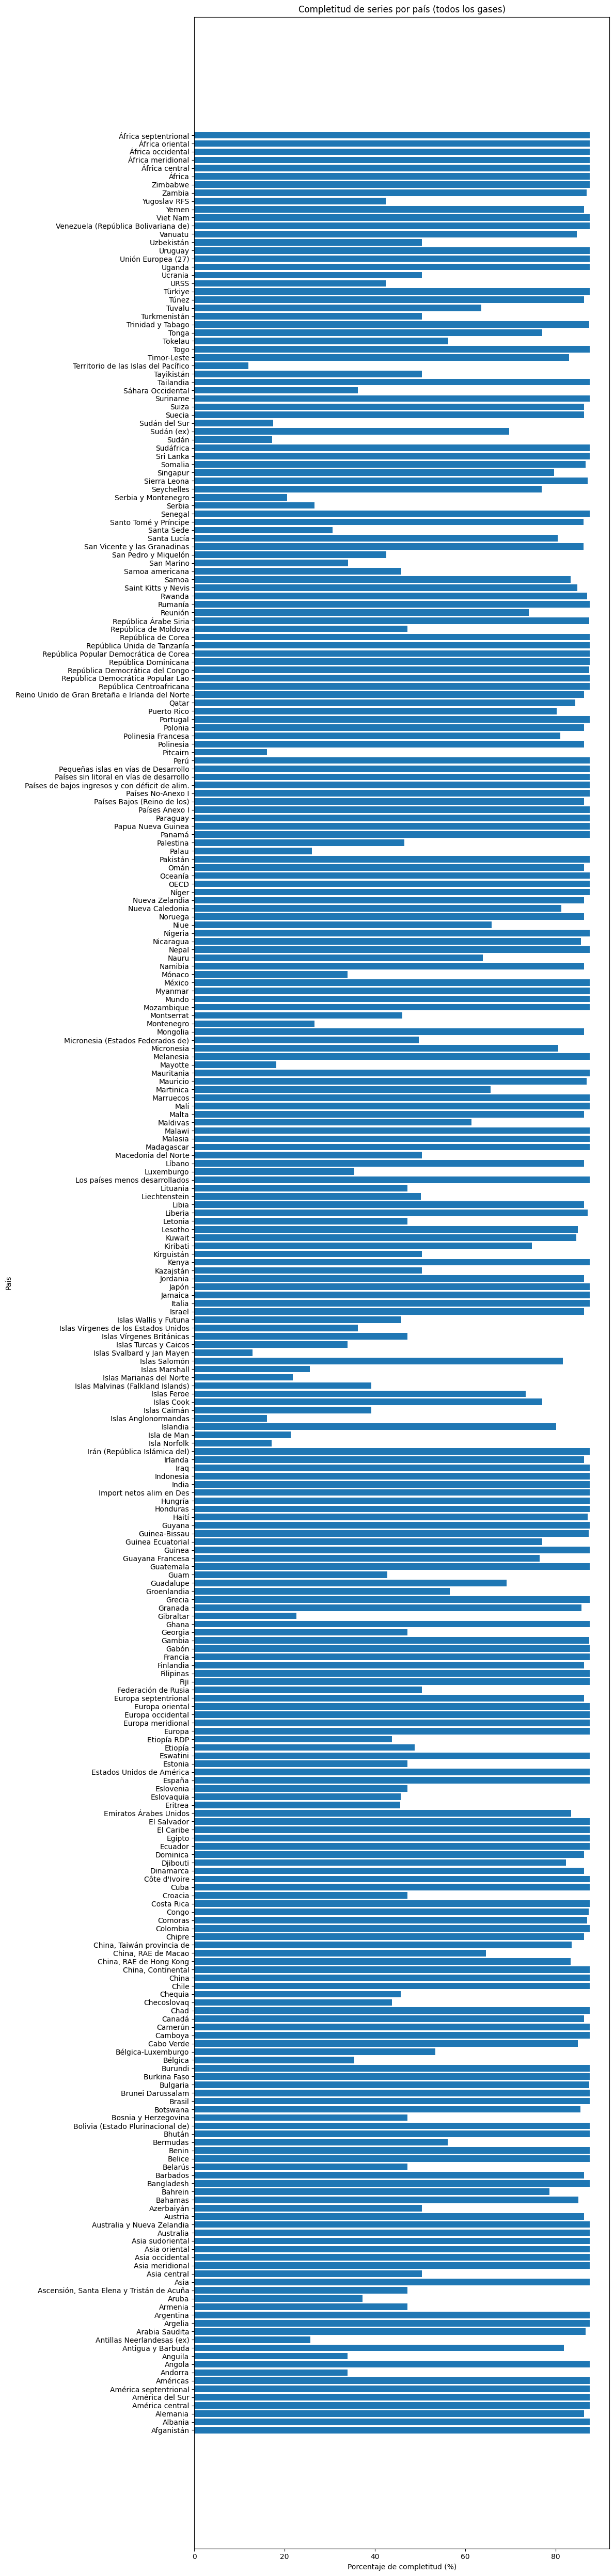

In [38]:
# --- Visual opcional ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12,50))
plt.barh(df_completeness2["Área"], df_completeness2["Porcentaje completo"])
plt.xlabel("Porcentaje de completitud (%)")
plt.ylabel("País")
plt.title("Completitud de series por país (todos los gases)")
plt.tight_layout()
plt.show()


In [21]:
df = df.dropna(subset=["Año", "Valor"])


In [22]:
# Mapear cada categoría a un índice
area_to_idx = {area: i for i, area in enumerate(df["Área"].unique())}
prod_to_idx = {prod: i for i, prod in enumerate(df["Producto"].unique())}
elem_to_idx = {elem: i for i, elem in enumerate(df["Elemento"].unique())}
year_to_idx = {year: i for i, year in enumerate(sorted(df["Año"].unique()))}

# Agregar las columnas indexadas al DataFrame
df["area_idx"] = df["Área"].map(area_to_idx)
df["prod_idx"] = df["Producto"].map(prod_to_idx)
df["elem_idx"] = df["Elemento"].map(elem_to_idx)
df["year_idx"] = df["Año"].map(year_to_idx)


In [23]:
import torch
import numpy as np

num_areas = len(area_to_idx)
num_prods = len(prod_to_idx)
num_elems = len(elem_to_idx)
num_years = len(year_to_idx)

# Inicializamos el tensor con NaN (o ceros si preferís)
tensor = torch.full(
    (num_areas, num_prods, num_elems, num_years),
    float('nan')
)

# Rellenamos con los valores existentes
for _, row in df.iterrows():
    a, p, e, y = row["area_idx"], row["prod_idx"], row["elem_idx"], row["year_idx"]
    tensor[a, p, e, y] = row["Valor"]


In [24]:
# Calculamos la media y desviación ignorando NaN de forma manual
mask = ~torch.isnan(tensor)
mean_val = torch.sum(tensor[mask]) / mask.sum()
std_val = torch.sqrt(torch.sum(((tensor[mask] - mean_val) ** 2)) / mask.sum())

# AGREGAMOS EPSILON PARA EVITAR DIVISIÓN POR CERO
epsilon = 1e-8
std_val = std_val + epsilon

print(f"Media: {mean_val.item():.4f}")
print(f"Desviación estándar: {std_val.item():.4f}")

tensor_norm = (tensor - mean_val) / std_val

# Verificar que no hay NaN o Inf después de normalizar
print(f"NaN después de normalización: {torch.isnan(tensor_norm).sum().item()}")
print(f"Inf después de normalización: {torch.isinf(tensor_norm).sum().item()}")


Media: 11641.1631
Desviación estándar: 162921.1250
NaN después de normalización: 1369005
Inf después de normalización: 0


In [25]:
def generar_secuencias(tensor, window=5):
    """
    Crea pares (input_seq, target) para entrenamiento temporal.
    Cada secuencia tiene longitud 'window' y el target es el siguiente año.
    """
    X, y = [], []
    num_years = tensor.shape[-1]
    for t in range(num_years - window):
        X.append(tensor[..., t:t+window])
        y.append(tensor[..., t+window])
    return torch.stack(X), torch.stack(y)

X, y = generar_secuencias(tensor_norm, window=5)
print("Shape de X:", X.shape)  # (n_samples, areas, productos, elementos, años_ventana)
print("Shape de y:", y.shape)


Shape de X: torch.Size([59, 280, 16, 9, 5])
Shape de y: torch.Size([59, 280, 16, 9])


In [26]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatioTemporalNetWithEmbeddings(nn.Module):
    def __init__(self, 
                 num_areas, 
                 num_prods, 
                 num_elems, 
                 window=5, 
                 hidden_channels=16,  # REDUCIDO de 32
                 lstm_hidden=32,      # REDUCIDO de 64
                 embedding_dim=4):    # REDUCIDO de 8
        super().__init__()
        
        self.area_emb = nn.Embedding(num_areas, embedding_dim)
        self.prod_emb = nn.Embedding(num_prods, embedding_dim)
        
        # Inicialización más conservadora
        nn.init.normal_(self.area_emb.weight, mean=0, std=0.01)
        nn.init.normal_(self.prod_emb.weight, mean=0, std=0.01)
        
        self.conv2d = nn.Sequential(
            nn.Conv2d(num_elems, hidden_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, hidden_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.ReLU()
        )
        
        # Inicializar convoluciones
        for m in self.conv2d.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
        
        spatial_features = num_areas * num_prods * hidden_channels
        
        self.lstm = nn.LSTM(
            input_size=spatial_features + 2 * embedding_dim,
            hidden_size=lstm_hidden,
            num_layers=2,
            batch_first=True,
            dropout=0.2
        )
        
        # Inicializar LSTM
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                nn.init.constant_(param.data, 0)
        
        self.fc = nn.Sequential(
            nn.Linear(lstm_hidden, lstm_hidden // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(lstm_hidden // 2, num_areas * num_prods * num_elems)
        )
        
        # Inicializar FC
        for m in self.fc.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
        
        self.num_areas = num_areas
        self.num_prods = num_prods
        self.num_elems = num_elems
        
    def forward(self, x, area_idx, prod_idx):
        batch_size = x.size(0)
        window = x.size(-1)
        
        # REEMPLAZAR NaN CON 0 EN LA ENTRADA
        x = torch.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)
        
        area_vec = self.area_emb(area_idx)
        prod_vec = self.prod_emb(prod_idx)
        emb = torch.cat([area_vec, prod_vec], dim=-1)
        
        temporal_features = []
        
        for t in range(window):
            x_t = x[..., t]
            x_t = x_t.permute(0, 3, 1, 2)
            
            conv_out = self.conv2d(x_t)
            conv_flat = conv_out.flatten(1)
            temporal_features.append(conv_flat)
        
        seq = torch.stack(temporal_features, dim=1)
        emb_expanded = emb.unsqueeze(1).repeat(1, window, 1)
        seq = torch.cat([seq, emb_expanded], dim=-1)
        
        lstm_out, _ = self.lstm(seq)
        last_hidden = lstm_out[:, -1, :]
        
        out = self.fc(last_hidden)
        out = out.view(batch_size, self.num_areas, self.num_prods, self.num_elems)
        
        return out

In [28]:
num_areas = len(df["Área"].unique())
num_prods = len(df["Producto"].unique())
num_elems = len(df["Elemento"].unique())

window = 5
batch_size = 8

# Crear modelo con parámetros reducidos
model = SpatioTemporalNetWithEmbeddings(
    num_areas=num_areas,
    num_prods=num_prods,
    num_elems=num_elems,
    window=window,
    hidden_channels=16,  # REDUCIDO
    lstm_hidden=32,      # REDUCIDO
    embedding_dim=4      # REDUCIDO
)

# Test con datos reales (no aleatorios)
X_test = X[:batch_size].clone()
area_idx_test = torch.randint(0, num_areas, (batch_size,))
prod_idx_test = torch.randint(0, num_prods, (batch_size,))

y_pred = model(X_test, area_idx_test, prod_idx_test)

print("✓ Input shape:", X_test.shape)
print("✓ Output shape:", y_pred.shape)
print("✓ Output contiene NaN:", torch.isnan(y_pred).any().item())
print("✓ Output contiene Inf:", torch.isinf(y_pred).any().item())
print("✓ Output min/max:", y_pred.min().item(), "/", y_pred.max().item())

total_params = sum(p.numel() for p in model.parameters())
print(f"\n📊 Total de parámetros: {total_params:,}")


✓ Input shape: torch.Size([8, 280, 16, 9, 5])
✓ Output shape: torch.Size([8, 280, 16, 9])
✓ Output contiene NaN: False
✓ Output contiene Inf: False
✓ Output min/max: -0.0073923333548009396 / 0.006941009312868118

📊 Total de parámetros: 9,879,712


In [29]:
# ============================================
# CELDA 3: Preparación de datos para entrenamiento
# ============================================

# Crear índices para cada muestra del dataset
# Estos índices deben reflejar el país/producto principal de cada muestra
n_samples = X.shape[0]

# OPCIÓN 1: Índices aleatorios (para testing rápido)
area_indices = torch.randint(0, num_areas, (n_samples,))
prod_indices = torch.randint(0, num_prods, (n_samples,))

# OPCIÓN 2: Si quieres índices más significativos basados en los datos
# Por ejemplo, el país y producto con mayor emisión promedio en cada muestra
# area_indices = torch.zeros(n_samples, dtype=torch.long)
# prod_indices = torch.zeros(n_samples, dtype=torch.long)
# for i in range(n_samples):
#     # Calcula promedios y encuentra índices máximos
#     avg = X[i].mean(dim=-1)  # promedio temporal
#     mask = ~torch.isnan(avg)
#     if mask.sum() > 0:
#         avg[~mask] = float('-inf')
#         flat_idx = avg.flatten().argmax()
#         area_idx = flat_idx // (num_prods * num_elems)
#         prod_idx = (flat_idx // num_elems) % num_prods
#         area_indices[i] = area_idx
#         prod_indices[i] = prod_idx

# Crear dataset actualizado
dataset = TensorDataset(X, y, area_indices, prod_indices)

# Split train/validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Crear dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print(f"✓ Dataset preparado:")
print(f"  - Total samples: {n_samples}")
print(f"  - Train samples: {train_size}")
print(f"  - Val samples: {val_size}")




✓ Dataset preparado:
  - Total samples: 59
  - Train samples: 47
  - Val samples: 12


In [30]:
import torch.optim as optim
import os

# Crear nuevo modelo
model = SpatioTemporalNetWithEmbeddings(
    num_areas=num_areas,
    num_prods=num_prods,
    num_elems=num_elems,
    window=5,
    hidden_channels=16,  # REDUCIDO
    lstm_hidden=32,      # REDUCIDO
    embedding_dim=4      # REDUCIDO
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f"Usando dispositivo: {device}\n")

# LEARNING RATE MÁS BAJO
optimizer = optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
criterion = nn.MSELoss()

def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    num_batches = 0
    valid_batches = 0
    
    for X_batch, y_batch, area_idx, prod_idx in loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        area_idx = area_idx.to(device)
        prod_idx = prod_idx.to(device)
        
        # Verificar que hay suficientes valores válidos
        mask = ~torch.isnan(y_batch)
        if mask.sum() < 10:  # Requiere al menos 10 valores válidos
            continue
        
        optimizer.zero_grad()
        
        y_pred = model(X_batch, area_idx, prod_idx)
        
        # Verificar que la predicción es válida
        if torch.isnan(y_pred).any() or torch.isinf(y_pred).any():
            print(f"  ⚠️ Predicción inválida en batch {num_batches}, skipping")
            continue
        
        loss = criterion(y_pred[mask], y_batch[mask])
        
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"  ⚠️ Loss inválido en batch {num_batches}, skipping")
            continue
        
        loss.backward()
        
        # Gradient clipping más agresivo
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        
        optimizer.step()
        
        total_loss += loss.item()
        valid_batches += 1
        num_batches += 1
    
    if valid_batches == 0:
        return float('nan')
    
    return total_loss / valid_batches


def validate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    num_batches = 0
    
    with torch.no_grad():
        for X_batch, y_batch, area_idx, prod_idx in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            area_idx = area_idx.to(device)
            prod_idx = prod_idx.to(device)
            
            mask = ~torch.isnan(y_batch)
            if mask.sum() < 10:
                continue
            
            y_pred = model(X_batch, area_idx, prod_idx)
            
            if torch.isnan(y_pred).any() or torch.isinf(y_pred).any():
                continue
            
            loss = criterion(y_pred[mask], y_batch[mask])
            
            if not (torch.isnan(loss) or torch.isinf(loss)):
                total_loss += loss.item()
                num_batches += 1
    
    if num_batches == 0:
        return float('nan')
    
    return total_loss / num_batches


# Loop de entrenamiento con debugging
num_epochs = 200
best_val_loss = float('inf')
patience_counter = 0
max_patience = 10

print("🚀 Iniciando entrenamiento...\n")

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate(model, val_loader, criterion, device)
    
    # Verificar si los losses son válidos
    if not (torch.isnan(torch.tensor(train_loss)) or torch.isnan(torch.tensor(val_loss))):
        scheduler.step(val_loss)
        
        if epoch % 5 == 0:
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Época {epoch:3d} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | LR: {current_lr:.6f}")
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"  ✓ Mejor modelo guardado (val_loss: {val_loss:.6f})")
        else:
            patience_counter += 1
        
        if patience_counter >= max_patience:
            print(f"\n⚠️ Early stopping en época {epoch}")
            break
    else:
        print(f"Época {epoch:3d} | Train Loss: {train_loss} | Val Loss: {val_loss} (INVÁLIDO)")
        if epoch == 0:
            print("\n❌ ERROR: Loss es NaN desde el inicio.")
            print("   Diagnóstico:")
            print(f"   - X contiene NaN: {torch.isnan(X).sum().item()} valores")
            print(f"   - y contiene NaN: {torch.isnan(y).sum().item()} valores")
            print(f"   - X contiene Inf: {torch.isinf(X).sum().item()} valores")
            print(f"   - Valores válidos en y: {(~torch.isnan(y)).sum().item()}")
            break

print(f"\n✅ Entrenamiento completado!")

if os.path.exists('best_model.pth'):
    print(f"📊 Mejor val loss: {best_val_loss:.6f}")
    model.load_state_dict(torch.load('best_model.pth'))
    print("✓ Mejor modelo cargado")
else:
    print("⚠️ No se guardó ningún modelo válido")
    print("   El modelo no convergió. Posibles causas:")
    print("   1. Datos con demasiados NaN")
    print("   2. Varianza muy baja en los datos")
    print("   3. Problema en la normalización")


Usando dispositivo: cpu

🚀 Iniciando entrenamiento...

Época   0 | Train Loss: 1.004829 | Val Loss: 0.997266 | LR: 0.000500
  ✓ Mejor modelo guardado (val_loss: 0.997266)
  ✓ Mejor modelo guardado (val_loss: 0.995923)
  ✓ Mejor modelo guardado (val_loss: 0.994175)
  ✓ Mejor modelo guardado (val_loss: 0.992060)
  ✓ Mejor modelo guardado (val_loss: 0.989612)
Época   5 | Train Loss: 1.003031 | Val Loss: 0.987068 | LR: 0.000500
  ✓ Mejor modelo guardado (val_loss: 0.987068)
  ✓ Mejor modelo guardado (val_loss: 0.984366)
  ✓ Mejor modelo guardado (val_loss: 0.981590)
  ✓ Mejor modelo guardado (val_loss: 0.978313)
  ✓ Mejor modelo guardado (val_loss: 0.974673)
Época  10 | Train Loss: 0.983461 | Val Loss: 0.970798 | LR: 0.000500
  ✓ Mejor modelo guardado (val_loss: 0.970798)
  ✓ Mejor modelo guardado (val_loss: 0.966314)
  ✓ Mejor modelo guardado (val_loss: 0.960847)
  ✓ Mejor modelo guardado (val_loss: 0.955119)
  ✓ Mejor modelo guardado (val_loss: 0.948803)
Época  15 | Train Loss: 0.950317 

In [31]:
print("=" * 60)
print("DIAGNÓSTICO DE DATOS")
print("=" * 60)

# Verificar tensor original
print("\n1. Tensor Original:")
print(f"   Shape: {tensor.shape}")
print(f"   Valores totales: {tensor.numel()}")
print(f"   Valores NaN: {torch.isnan(tensor).sum().item()}")
print(f"   Valores válidos: {(~torch.isnan(tensor)).sum().item()}")
print(f"   % de valores válidos: {(~torch.isnan(tensor)).sum().item() / tensor.numel() * 100:.2f}%")

valid_values = tensor[~torch.isnan(tensor)]
if len(valid_values) > 0:
    print(f"   Min: {valid_values.min().item():.4f}")
    print(f"   Max: {valid_values.max().item():.4f}")
    print(f"   Mean: {valid_values.mean().item():.4f}")
    print(f"   Std: {valid_values.std().item():.4f}")

# Verificar tensor normalizado
print("\n2. Tensor Normalizado:")
print(f"   NaN: {torch.isnan(tensor_norm).sum().item()}")
print(f"   Inf: {torch.isinf(tensor_norm).sum().item()}")

valid_norm = tensor_norm[~torch.isnan(tensor_norm)]
if len(valid_norm) > 0:
    print(f"   Min: {valid_norm.min().item():.4f}")
    print(f"   Max: {valid_norm.max().item():.4f}")
    print(f"   Mean: {valid_norm.mean().item():.4f}")
    print(f"   Std: {valid_norm.std().item():.4f}")

# Verificar X e y
print("\n3. Secuencias (X, y):")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")
print(f"   X contiene NaN: {torch.isnan(X).sum().item()}")
print(f"   y contiene NaN: {torch.isnan(y).sum().item()}")

# Verificar cada muestra
print("\n4. Análisis por muestra:")
for i in range(min(5, len(y))):
    valid = (~torch.isnan(y[i])).sum().item()
    total = y[i].numel()
    print(f"   Muestra {i}: {valid}/{total} valores válidos ({valid/total*100:.1f}%)")

print("\n" + "=" * 60)

DIAGNÓSTICO DE DATOS

1. Tensor Original:
   Shape: torch.Size([280, 16, 9, 64])
   Valores totales: 2580480
   Valores NaN: 1369005
   Valores válidos: 1211475
   % de valores válidos: 46.95%
   Min: -3877550.2500
   Max: 21545820.0000
   Mean: 11641.1631
   Std: 162921.1875

2. Tensor Normalizado:
   NaN: 1369005
   Inf: 0
   Min: -23.8716
   Max: 132.1755
   Mean: 0.0000
   Std: 1.0000

3. Secuencias (X, y):
   X shape: torch.Size([59, 280, 16, 9, 5])
   y shape: torch.Size([59, 280, 16, 9])
   X contiene NaN: 6221158
   y contiene NaN: 1239700

4. Análisis por muestra:
   Muestra 0: 14471/40320 valores válidos (35.9%)
   Muestra 1: 14474/40320 valores válidos (35.9%)
   Muestra 2: 14485/40320 valores válidos (35.9%)
   Muestra 3: 14485/40320 valores válidos (35.9%)
   Muestra 4: 14488/40320 valores válidos (35.9%)



In [32]:
import torch
import pandas as pd
import plotly.express as px

# Sumamos NaN sobre elementos
nan_per_year = torch.isnan(tensor).sum(dim=2)  # (áreas, productos, años)
num_areas, num_prods, num_years = nan_per_year.shape

# Convertimos a DataFrame largo
data = []
for a in range(num_areas):
    for p in range(num_prods):
        for y in range(num_years):
            data.append({
                "Área": a,
                "Producto": p,
                "Año": 1961 + y,  # ajusta si tu primer año no es 1961
                "NaN_count": int(nan_per_year[a,p,y])
            })
df_plot = pd.DataFrame(data)

# Creamos el heatmap interactivo
fig = px.density_heatmap(
    df_plot,
    x="Producto",
    y="Área",
    z="NaN_count",
    animation_frame="Año",  # slider automático por año
    color_continuous_scale="Reds",
    labels={"NaN_count": "Cantidad de NaN"}
)
fig.update_layout(height=600, width=900, title_text="Valores faltantes por Área y Producto")
fig.show()



In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

pred_years = 10
window = 5

# Tomamos la última ventana de datos de la última muestra de entrenamiento
# X: tensor de entrenamiento con shape (samples, areas, productos, elementos, time)
X_input = X[-1:, ..., -window:].to(device)  # shape: (1, areas, productos, elementos, window)

# Usar los índices originales de entrenamiento de la última muestra
area_idx = area_indices[-1:].to(device)  # shape: (1, areas*productos) o como se entrenó
prod_idx = prod_indices[-1:].to(device)

preds = []

with torch.no_grad():
    for _ in range(pred_years):
        # Forward pass
        y_pred = model(X_input, area_idx, prod_idx)  # shape: (1, areas, productos, elementos)

        # Guardar predicción
        preds.append(y_pred.squeeze(0))  # shape: (areas, productos, elementos)

        # Actualizar ventana para la siguiente predicción
        # Concatenamos y_pred al final de la ventana y eliminamos el primer timestep
        X_input = torch.cat([X_input[..., 1:], y_pred.unsqueeze(-1)], dim=-1)  # mantiene shape correcta

# Stack final de predicciones en el eje temporal
preds_tensor = torch.stack(preds, dim=-1)  # shape: (areas, productos, elementos, pred_years)

# Desnormalizar si corresponde
preds_denorm = preds_tensor * std_val + mean_val

print("Shape final de predicciones:", preds_denorm.shape)



Shape final de predicciones: torch.Size([280, 16, 9, 10])


In [34]:
import pandas as pd
import numpy as np
import plotly.express as px

# Asumo que tenés diccionarios para mapear índices a nombres
# area_to_idx, prod_to_idx, elem_to_idx
# invertimos los diccionarios para obtener listas ordenadas
areas = list(area_to_idx.keys())
productos = list(prod_to_idx.keys())
elementos = list(elem_to_idx.keys())

# Años futuros
years_future = np.arange(df['Año'].max() + 1, df['Año'].max() + 1 + pred_years)

# Convertimos tensor a DataFrame largo
data = []
for a_idx, a in enumerate(areas):
    for p_idx, p in enumerate(productos):
        for e_idx, e in enumerate(elementos):
            for y_idx, year in enumerate(years_future):
                data.append({
                    "Área": a,
                    "Producto": p,
                    "Elemento": e,
                    "Año": year,
                    "Valor": preds_denorm[a_idx, p_idx, e_idx, y_idx].item()
                })

df_pred = pd.DataFrame(data)

# Seleccionamos un gas para visualizar
gas = elementos[0]
df_plot = df_pred[df_pred["Elemento"] == gas]

# Pivot con agregación para evitar duplicados
df_pivot = df_plot.pivot_table(
    index="Área",
    columns="Producto",
    values="Valor",
    aggfunc='mean'  # si hay duplicados, promedia
)

# Heatmap estático (sin animación)
fig = px.imshow(
    df_pivot.values,
    labels=dict(x="Producto", y="Área", color="Emisiones (kilotones)"),
    x=list(df_pivot.columns),
    y=list(df_pivot.index),
    color_continuous_scale="Viridis",
    width=1200,   # más ancho
    height=800,   # más alto
    aspect="auto"  # <--- clave para evitar el "gráfico fino"
)

fig.update_layout(
    title=f"Predicciones de Emisiones para {gas}",
    xaxis_title="Producto",
    yaxis_title="Área",
    coloraxis_colorbar=dict(title="Kilotones")
)

fig.show()
